In [103]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from preproc import *
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

                        Attribute information
Preg - Pregnancies - Number of times pregnant real [0.0, 17.0]<br />
Plas - Glucose - Plasma glucose concentration in an oral glucose tolerance test real [0.0, 199.0]<br />
Pres - Blood Pressure - Diastolic blood pressure (mm Hg) [0.0, 122.0]<br />
Skin - Skin Thickness - Triceps skin fold thickness (mm) real [0.0, 99.0]<br />
Insu - Insulin - Hour serum insulin (mu U/ml) real [0.0, 846.0]<br />
Mass - BMI Body mass index (weight in kg/(height in m)^2) [0.0, 67.1]<br />
Pedi - Diabetes Pedigree Function Diabetes pedigree function real [0.078, 2.42]
Age -  years real [21.0, 81.0]<br />
Outcome - diabetes or not

In [104]:
header = ['Preg', 'Plas', 'Pres','Skin', 'Insu', 'Mass', 'Pedi', 'Age', 'Outcome']
df = pd.read_csv('pima.csv', header=None, names=header)

In [105]:
#number of rows and columns
df.shape

(691, 9)

In [106]:
#data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
Preg       691 non-null object
Plas       691 non-null object
Pres       691 non-null object
Skin       691 non-null object
Insu       691 non-null object
Mass       691 non-null object
Pedi       691 non-null object
Age        691 non-null object
Outcome    691 non-null object
dtypes: object(9)
memory usage: 24.3+ KB


In [107]:
# all data to float, Outcome to 0 and 1, 0 to NaN in relevant columns
df = df.replace('<null>',np.nan)
df['Outcome'] = pd.factorize(df['Outcome'])[0]
df = df.astype(float)
df.iloc[:, 1:-3].replace(0,np.nan,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
Preg       625 non-null float64
Plas       618 non-null float64
Pres       585 non-null float64
Skin       440 non-null float64
Insu       314 non-null float64
Mass       615 non-null float64
Pedi       616 non-null float64
Age        629 non-null float64
Outcome    691 non-null float64
dtypes: float64(9)
memory usage: 48.6 KB


d:\programmes\python\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [108]:
df.describe()

,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,Outcome
count,625.00000,618.000000,585.000000,440.000000,314.000000,615.000000,616.000000,629.000000,691.000000
mean,3.83040,121.113269,72.466667,29.013636,157.697452,32.490732,0.470636,33.281399,0.651230
std,3.37364,30.210930,12.191789,10.573952,119.089279,6.866059,0.331134,11.903085,0.476926
min,0.00000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.00000,100.000000,64.000000,21.000000,76.000000,27.500000,0.248000,24.000000,0.000000
50%,3.00000,117.000000,72.000000,29.000000,128.500000,32.400000,0.377000,29.000000,1.000000
75%,6.00000,139.000000,80.000000,36.000000,192.750000,36.650000,0.612250,41.000000,1.000000
max,17.00000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000,1.000000


In [109]:
# number of Nans in every column
nans = [{i:df[i].isna().sum()} for i in df.columns]
nans

[{'Preg': 66},
 {'Plas': 73},
 {'Pres': 106},
 {'Skin': 251},
 {'Insu': 377},
 {'Mass': 76},
 {'Pedi': 75},
 {'Age': 62},
 {'Outcome': 0}]

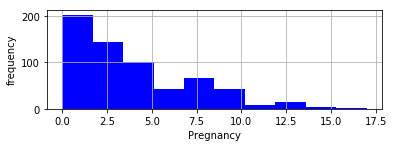

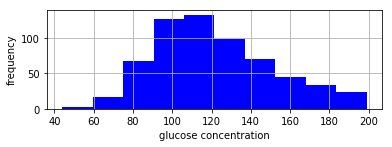

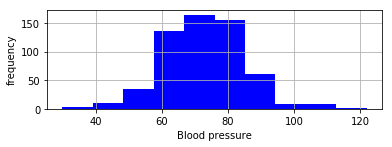

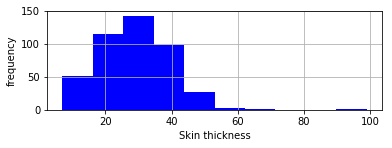

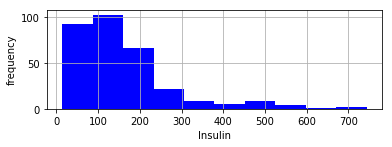

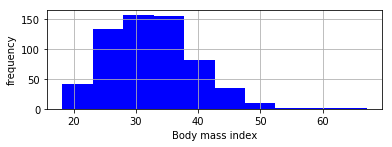

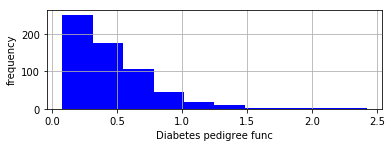

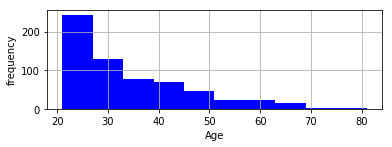

In [110]:
n = {'Preg': 'Pregnancy', 'Plas': 'glucose concentration', 'Pres': 'Blood pressure', 'Skin': 'Skin thickness',
    'Insu': 'Insulin', 'Mass': 'Body mass index', 'Pedi': 'Diabetes pedigree func', 'Age': 'Age'}
for col in df.columns[:-1]:
    fig = plt.figure()
    ax = plt.subplot(211)
    ax.set_xlabel(n[col])
    ax.set_ylabel('frequency')
    df[col].hist(color = 'blue')

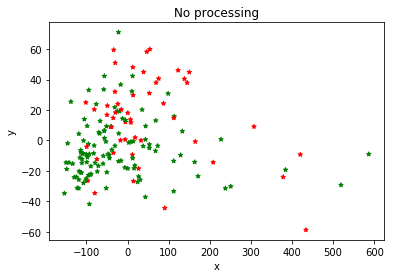

In [111]:
df_dropped = drop_n(df)
def pca_(df, title='No processing'):
    pca = PCA(n_components = 2)
    PC = pca.fit_transform(df.iloc[:, :-1])
    PC = pd.DataFrame(PC)
    PC.columns = ['x', 'y']
    label_color = ['green' if i==1 else 'red' for i in df['Outcome']]
    PC.plot.scatter(x='x', y='y', marker='*',
        color=label_color,
        title=title )
    plt.show()

pca_(df_dropped)

d:\programmes\python\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
d:\programmes\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


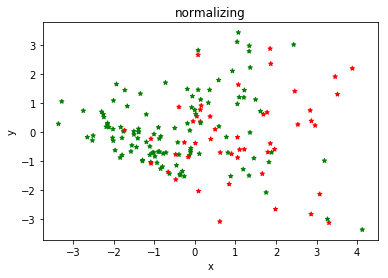

In [112]:
# normalazing
df_norm = df_dropped
df_norm.iloc[:, :-1] = norm(df_dropped.iloc[:, :-1])
pca_(df_norm, 'normalizing')

d:\programmes\python\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
d:\programmes\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


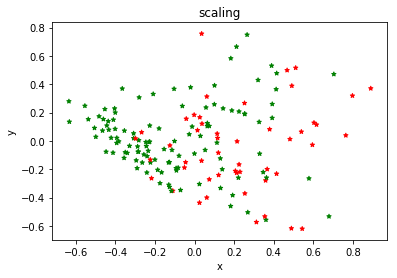

In [113]:
# scaling
df_scaling = df_dropped
df_scaling.iloc[:, :-1] = scaling(df_dropped.iloc[:, :-1])
pca_(df_scaling, 'scaling')

In [114]:
## fill Nans with different methods
# drop rows
df_dropped = drop_n(df)

In [115]:
# fill with mean, median, mode
df1 = df.copy()
df_mean = fill_n(df1)
df1 = df.copy()
df_median = fill_n(df1, 'median')
df1 = df.copy()
df_mode = fill_n(df1, 'mode')

In [116]:
#linear regression
df_lin = df.copy()
for col in df.columns[:-1]:
    df_lin[col] = linear_pred(df_lin.iloc[:, :-1].drop(col, axis=1), df_lin[col])

In [117]:
# knn
df_knn = df.copy()
for col in df_knn.columns[:-1]:
    df_k = df.copy()
    df_knn[col] = knn(df_k[col], df_k.iloc[:, :-1].drop(col, axis=1), 10) # 10 neihgbors because too many nans

In [118]:
# prediction for different methods with normalization
for i in [('dropped rows', df_dropped), ('mean', df_mean), ('mode', df_mode), ('median', df_median), 
          ('linear regression', df_lin), ('knn', df_knn)]:
    df_drop = i[1].copy()
    targets = df_drop['Outcome'].astype('category')
    # normalization
    df_drop = norm(df_drop.iloc[:, :-1])
    x_train,  x_test, y_train, y_test =  train_test_split(df_drop, targets, test_size = 0.3, random_state = 10)
    # svc model
    svm = SVC()
    svm.fit(x_train, y_train)
    predict = svm.predict(x_test)
    # f1 score
    print(i[0], '\n', '  f1 score: ', f1_score(y_test, predict))
    

dropped rows 
   f1 score:  0.742857142857
mean 
   f1 score:  0.818791946309
mode 
   f1 score:  0.806779661017
median 
   f1 score:  0.805369127517
linear regression 
   f1 score:  0.820689655172
knn 
   f1 score:  0.814814814815


d:\programmes\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\programmes\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\programmes\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\programmes\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default 

In [119]:
# нижче середнього результати передбачення, тому що дані були штучно заповнені додатковими Nan,
# порівняно з оригінальним датасетом, і заповнених даних виявилося замало для отримання вищої точності